<a href="https://colab.research.google.com/github/AnIsAsPe/Recomendaci-n-de-libros-usando-LDA/blob/main/Notebooks/Modelos_generativos_de_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 4.0 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np

import re               # módulo operaciones expresiones regulares
import operator

import contractions
from collections import Counter
import random 

import matplotlib.pyplot as plt


## Funciones

In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "") 
  return texto

In [4]:
def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''
  #quitar contracciones
  texto = contractions.fix(texto)
  
  #Convertir en mínusculas 
  texto = texto.lower()

  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

In [5]:
def obtener_ngramas(texto, N):
    palabras_en_texto = texto.split()
    
    ngramas = (tuple(palabras_en_texto[i:i+N]) for i in range(len(palabras_en_texto)-N+1))
    return ngramas

# Leer y limpiar texto

obtener archivo [txt](https://github.com/sharanyavb/harry-potter/blob/master/Books_Text/HP1.txt) 

In [6]:
!wget https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt

--2023-03-22 00:08:42--  https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492006 (480K) [text/plain]
Saving to: ‘HP1.txt’

HP1.txt             100%[===================>] 480.47K  --.-KB/s    in 0.04s   

2023-03-22 00:08:43 (12.9 MB/s) - ‘HP1.txt’ saved [492006/492006]



In [7]:
libro = leer_libro('/content/HP1.txt')

libro[:1500]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t P

In [8]:
# lista con cadenas correspondientes al pie de página.
borrar = ['Page | {} Harry Potter and the Philosophers Stone - J.K. Rowling'.format(i)\
         for i in range(2,347)]

for tx in borrar:
    libro = libro.replace(tx, '')

libro[:1500]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t  

In [10]:
libro_limpio = limpiar_texto(libro)
libro_limpio[:1500]


'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you would expect to be involved in anything strange or mysterious because they just did not hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they did not think they could bear it if anyone found out about the potters mrs potter was mrs dursley s sister but they had not met for several years

# Distribución de probabilidad de las palabras en el libro

In [11]:
palabras_frecuencia = Counter(libro_limpio.split())  

# Counter es una "colección" donde los elementos encontrados en
# cualquier objeto iterable son guardados como claves de un
# diccionario y el conteo como valores 

palabras_frecuencia

Counter({'the': 3651,
         'boy': 85,
         'who': 200,
         'lived': 9,
         'mr': 81,
         'and': 1935,
         'mrs': 46,
         'dursley': 57,
         'of': 1311,
         'number': 17,
         'four': 36,
         'privet': 16,
         'drive': 20,
         'were': 332,
         'proud': 7,
         'to': 1872,
         'say': 75,
         'that': 688,
         'they': 690,
         'perfectly': 5,
         'normal': 10,
         'thank': 9,
         'you': 1037,
         'very': 172,
         'much': 76,
         'last': 84,
         'people': 96,
         'would': 421,
         'expect': 13,
         'be': 366,
         'involved': 5,
         'in': 967,
         'anything': 72,
         'strange': 23,
         'or': 109,
         'mysterious': 6,
         'because': 91,
         'just': 180,
         'did': 297,
         'not': 1014,
         'hold': 12,
         'with': 416,
         'such': 21,
         'nonsense': 4,
         'was': 1262,
         'd

In [12]:
vocabulario = list(palabras_frecuencia.keys())
print('Palabras en el vocabulario de HP1: ', len(vocabulario))

Palabras en el vocabulario de HP1:  5704


Visualización de la probabilidad de ocurrencia de las 80 palabras más frecuentes

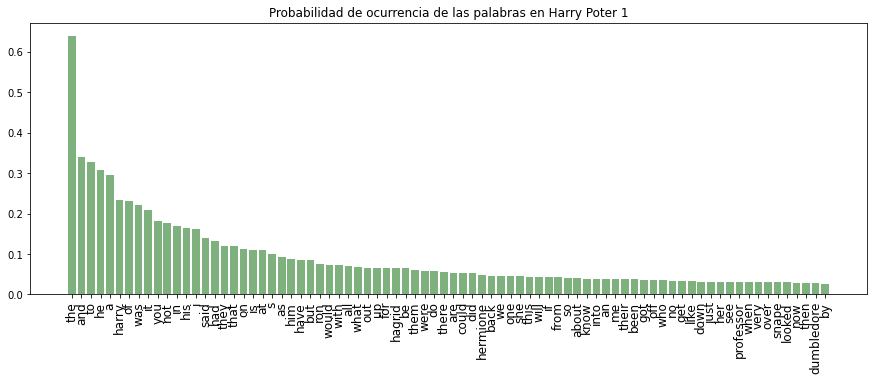

In [13]:
Probabilidad_palabra = {k : v /len(vocabulario) for k, v in palabras_frecuencia.most_common(80)}

x, y  = zip(*sorted(Probabilidad_palabra.items(),key=operator.itemgetter(1), reverse=True))

fig = plt.figure(figsize=(15,5))
plt.bar(x,y, 
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Harry Poter 1')
plt.show()

# Generación de Texto con Distribución Uniforme

1. Declaramos una lista vacía donde guardaremos las palabras que tendra el texto
2. Escojemos la primera palabra de forma aleatoria con distribución uniforme **texto en negrita**

In [14]:
palabras = []  # inicializamos la lista de palabras

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))] 
palabras.append(palabra_selec)

' '.join(palabras)

'sad'

In [15]:
long = 10
for _ in range(long):
    palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]  
    palabras.append(palabra_selec)

' '.join(palabras)

'sad director tickled grips platform sorting colored row more hour borrowed'

lo que sería equivalente a lo siguiente:

In [16]:
' '.join(np.random.choice(vocabulario,100))

'agree some air whatever flowered smatter trevor positive sickles drifting couldn doubted waddling snout anywhere nott scraping sizes scene beast most disappearing tries behind seeker cannot grassy spectators hurtled swam cry clouted uncertainly cars hut discover doughnut uric alternative binns radish roof roars then peas math marched wands striped higgs favor levi firecrackers bars anger stove oy steel sheet eager tied spindly deputy measured nitwit chappie mounted velvety scruff darling her tripe corned crashing nevertheless space bear same railway fang dud ripping flexible scene snare bustling within watering bustling band wilder punishments bundle younger ward eh thunder whispering local oyt'

# Generación de Texto con distribucción de palabras en HP

In [17]:
' '.join(random.sample(libro_limpio.split(),100))    #Distribución en el libro

'sixteen showed those if this of his him by we peeves think sidled chamber year of their with that he in skimming you stopped between a all harry had heart shock gringotts not bunch away me reached began i a you was gathered finished crowded pretty at cannot if know how our trouble is to harry mimblewimble harry inside think around rumbling slope them it doors to and the opened the am anyway right did old a school it hagrid up pale to i exams that door last the nostrils or special hugging books ways crabbe they would flames too'

# Generación de texto usando N Gramas

In [20]:
unigramas = palabras_frecuencia
print('Unigramas Unicos: ', len(unigramas), end='\n\n')
unigramas

Unigramas Unicos:  5704



Counter({'the': 3651,
         'boy': 85,
         'who': 200,
         'lived': 9,
         'mr': 81,
         'and': 1935,
         'mrs': 46,
         'dursley': 57,
         'of': 1311,
         'number': 17,
         'four': 36,
         'privet': 16,
         'drive': 20,
         'were': 332,
         'proud': 7,
         'to': 1872,
         'say': 75,
         'that': 688,
         'they': 690,
         'perfectly': 5,
         'normal': 10,
         'thank': 9,
         'you': 1037,
         'very': 172,
         'much': 76,
         'last': 84,
         'people': 96,
         'would': 421,
         'expect': 13,
         'be': 366,
         'involved': 5,
         'in': 967,
         'anything': 72,
         'strange': 23,
         'or': 109,
         'mysterious': 6,
         'because': 91,
         'just': 180,
         'did': 297,
         'not': 1014,
         'hold': 12,
         'with': 416,
         'such': 21,
         'nonsense': 4,
         'was': 1262,
         'd

In [21]:
bigramas = Counter(obtener_ngramas(libro_limpio, 2))
print('Bigramas Unicos: ', len(bigramas), end='\n\n')
bigramas

Bigramas Unicos:  41298



Counter({('the', 'boy'): 27,
         ('boy', 'who'): 7,
         ('who', 'lived'): 3,
         ('lived', 'mr'): 1,
         ('mr', 'and'): 3,
         ('and', 'mrs'): 7,
         ('mrs', 'dursley'): 19,
         ('dursley', 'of'): 1,
         ('of', 'number'): 4,
         ('number', 'four'): 8,
         ('four', 'privet'): 1,
         ('privet', 'drive'): 16,
         ('drive', 'were'): 1,
         ('were', 'proud'): 2,
         ('proud', 'to'): 1,
         ('to', 'say'): 20,
         ('say', 'that'): 3,
         ('that', 'they'): 16,
         ('they', 'were'): 99,
         ('were', 'perfectly'): 1,
         ('perfectly', 'normal'): 2,
         ('normal', 'thank'): 1,
         ('thank', 'you'): 8,
         ('you', 'very'): 1,
         ('very', 'much'): 2,
         ('much', 'they'): 2,
         ('were', 'the'): 10,
         ('the', 'last'): 22,
         ('last', 'people'): 1,
         ('people', 'you'): 1,
         ('you', 'would'): 29,
         ('would', 'expect'): 2,
         ('expec

In [22]:
trigramas = Counter(obtener_ngramas(libro_limpio,3))
trigramas

Counter({('the', 'boy', 'who'): 4,
         ('boy', 'who', 'lived'): 2,
         ('who', 'lived', 'mr'): 1,
         ('lived', 'mr', 'and'): 1,
         ('mr', 'and', 'mrs'): 3,
         ('and', 'mrs', 'dursley'): 4,
         ('mrs', 'dursley', 'of'): 1,
         ('dursley', 'of', 'number'): 1,
         ('of', 'number', 'four'): 4,
         ('number', 'four', 'privet'): 1,
         ('four', 'privet', 'drive'): 1,
         ('privet', 'drive', 'were'): 1,
         ('drive', 'were', 'proud'): 1,
         ('were', 'proud', 'to'): 1,
         ('proud', 'to', 'say'): 1,
         ('to', 'say', 'that'): 2,
         ('say', 'that', 'they'): 1,
         ('that', 'they', 'were'): 6,
         ('they', 'were', 'perfectly'): 1,
         ('were', 'perfectly', 'normal'): 1,
         ('perfectly', 'normal', 'thank'): 1,
         ('normal', 'thank', 'you'): 1,
         ('thank', 'you', 'very'): 1,
         ('you', 'very', 'much'): 1,
         ('very', 'much', 'they'): 1,
         ('much', 'they', 'were'

In [23]:
bigramas.most_common(5)

[(('of', 'the'), 305),
 (('in', 'the'), 270),
 (('it', 'was'), 227),
 (('on', 'the'), 218),
 (('he', 'was'), 209)]

## Crear textos basadas en la probabilidad de ocurrencia

In [30]:
secuencia = 'hola como estas'.split()
secuencia[-1]

'estas'

In [27]:
  
def probabilidad_bigrama(secuencia):
    if secuencia not in bigramas:
        return 0
    return bigramas[secuencia] / unigramas[secuencia[0]]
    
def probabilidad_trigrama(secuencia):
    if secuencia not in trigramas:
        return 0
    return trigramas[secuencia] / bigramas[secuencia[:2]]

def selecciona_siguiente_token(secuencia):
    lista_palabras_candidatas = []
    
    # Itera por todos los tokens del vocabulario
    # calculando la probabilidad de seleccionar la siguiente palabra
    for p in vocabulario:
        Prob1 = unigramas[p] / len(vocabulario)
        Prob2 = probabilidad_bigrama((secuencia[-1], p))
        Prob3 = probabilidad_trigrama((secuencia[-2], secuencia[-1], p)) if len(secuencia) >= 3 else 0
        
        # Usamos una interpolación lineal
        Probabilidad =  0.05*Prob1 + 0.35*Prob2 + 0.60*Prob3
        
        lista_palabras_candidatas.append((p, Probabilidad))
    
    # orenamos la lista de mayor a menor probabilidad
    lista_palabras_candidatas.sort(key=lambda x: x[1], reverse=True)
    return lista_palabras_candidatas[0][0]
   


In [28]:
palabras = []
longitud_texto = 100

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))] 
palabras.append(palabra_selec)

for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)

'j k rowling the school harry was not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have a good idea'